Nous allons visualiser les chemins clients en donnant un nombre à chaque page gabarit puis en les plotant
Le probleme de cette visualisation est que la distances entre les page gabarit est purement arbitraire.

Dans un second temps j'essayerais de regrouper les pages entre elle par similarité (TFIDF ou autre)

In [8]:
import pandas as pd

df = pd.read_csv('data/2022-07.csv', nrows=1000000)
df.head()

,platform,id_utilisateur,page,page_gabarit,categorie_page,univers_besoin,categorie_produit,heure_evenement,evt_conv_avant_vte_univers,evt_conv_avant_vte_categorie,action_realisee,id_visite,id_visiteur,visites
0,NPC,86700-0d0d3j7r0d9v0d0d9v9v7r3j0d0d,connexion_client,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-07-10 11:59:59.669,click_utilisateur,NaN,NaN,3F00867D4BF432E29027C8A8A03A335E,292B589E7B75AE1E1BA0403DD88A9CDBD7292D56,1
1,NPC,86700-0d0d3j2h0d6p0d0d1f2h7r3j1f0d,Particulier,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-07-10 11:59:59.584,chargement_page,NaN,NaN,3D0EE6A9B50730408526E90F1C67CFA5,4CFA471CDDD75C5BFBD31C9F44FB20DD1B7D01EA,1
2,NPC,86700-0d0d5n2h0d0d0d0d0d5n5n7r0d0d,Faire_un_virement,fonctions_connectees_virement,particulier,operations,moyens-paiement,2022-07-10 11:59:59.358,chargement_page,NaN,NaN,310B655094C630C98FC2EDDF84C8FB80,BDA9F051AF48E4EFB7A85677942E66C82B12F131,1
3,NPC,86700-0d0d0d3j0d1f0d0d2h1f6p3j0d0d,Professionnel,accueil_autres_marches,professionnel,NaN,NaN,2022-07-10 11:59:59.305,chargement_page,NaN,NaN,843966BE5B7D36758EED34FAA31B688C,F365CFE155CBA74E686E30A5329AAC6475260A8B,1
4,NPC,86700-0d0d3j7r0d3j0d0d1f9v4l3j0d0d,Mon_detail_de_compte,fonctions_connectees_detail_comptes_contrats,particulier,operations,synthese,2022-07-10 11:59:59.151,chargement_page,NaN,NaN,A1BC4F6298ED3BBAB57EEC9859249E79,ED0D1E1F1F03DBA8EC2CA02D63E59791EE6E1E29,1


In [9]:
df['page_gabarit_id'] = df['page_gabarit'].factorize()[0]
df.head()

,platform,id_utilisateur,page,page_gabarit,categorie_page,univers_besoin,categorie_produit,heure_evenement,evt_conv_avant_vte_univers,evt_conv_avant_vte_categorie,action_realisee,id_visite,id_visiteur,visites,page_gabarit_id
0,NPC,86700-0d0d3j7r0d9v0d0d9v9v7r3j0d0d,connexion_client,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-07-10 11:59:59.669,click_utilisateur,NaN,NaN,3F00867D4BF432E29027C8A8A03A335E,292B589E7B75AE1E1BA0403DD88A9CDBD7292D56,1,0
1,NPC,86700-0d0d3j2h0d6p0d0d1f2h7r3j1f0d,Particulier,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-07-10 11:59:59.584,chargement_page,NaN,NaN,3D0EE6A9B50730408526E90F1C67CFA5,4CFA471CDDD75C5BFBD31C9F44FB20DD1B7D01EA,1,0
2,NPC,86700-0d0d5n2h0d0d0d0d0d5n5n7r0d0d,Faire_un_virement,fonctions_connectees_virement,particulier,operations,moyens-paiement,2022-07-10 11:59:59.358,chargement_page,NaN,NaN,310B655094C630C98FC2EDDF84C8FB80,BDA9F051AF48E4EFB7A85677942E66C82B12F131,1,1
3,NPC,86700-0d0d0d3j0d1f0d0d2h1f6p3j0d0d,Professionnel,accueil_autres_marches,professionnel,NaN,NaN,2022-07-10 11:59:59.305,chargement_page,NaN,NaN,843966BE5B7D36758EED34FAA31B688C,F365CFE155CBA74E686E30A5329AAC6475260A8B,1,2
4,NPC,86700-0d0d3j7r0d3j0d0d1f9v4l3j0d0d,Mon_detail_de_compte,fonctions_connectees_detail_comptes_contrats,particulier,operations,synthese,2022-07-10 11:59:59.151,chargement_page,NaN,NaN,A1BC4F6298ED3BBAB57EEC9859249E79,ED0D1E1F1F03DBA8EC2CA02D63E59791EE6E1E29,1,3


In [10]:
df.sort_values(by=["heure_evenement"],inplace=True)

In [11]:
group = df.groupby('id_utilisateur').agg({'page_gabarit_id':list,'heure_evenement':'first'}).reset_index()
group.head()

,id_utilisateur,page_gabarit_id,heure_evenement
0,86700-0d0d0d0d0d0d0d0d0d0d2h6p2h0d,"[15, 15]",2022-07-30 07:49:35.312
1,86700-0d0d0d0d0d0d0d0d0d1f1f5n0d0d,"[7, 3, 7, 7, 3, 7, 1, 7, 1, 1, 7, 3, 7, 1, 7]",2022-07-13 09:14:40.891
2,86700-0d0d0d0d0d0d0d0d0d1f4l8t2h0d,"[0, 0, 7, 3, 7, 3]",2022-07-10 09:04:15.018
3,86700-0d0d0d0d0d0d0d0d0d2h0d7r0d0d,"[7, 7, 3, 2]",2022-07-01 10:19:50.149
4,86700-0d0d0d0d0d0d0d0d0d2h5n4l0d0d,"[0, 0, 7, 3, 7, 0, 0, 7, 4, 0, 0, 7, 0, 0, 7, ...",2022-07-05 18:41:56.953


In [12]:
group["len"] = group["page_gabarit_id"].apply(lambda x: len(x))

In [13]:
group["len"].describe()

count    89874.000000
mean        11.126688
std         17.985234
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max       4188.000000
Name: len, dtype: float64

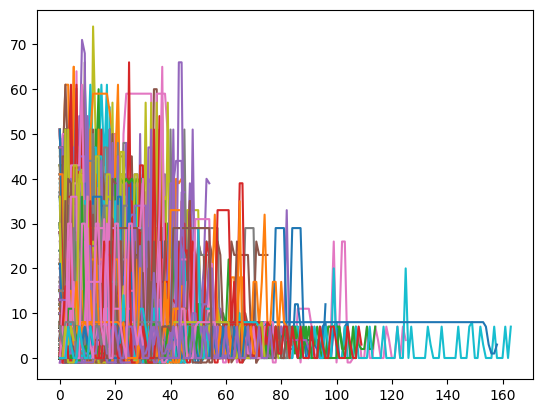

In [14]:
import matplotlib.pyplot as plt

for i, row in group.head(10000).iterrows():
    plt.plot(row['page_gabarit_id'], label=i)

Maintenant, la magie : nous allons utiliser word2vec pour créer des coordonnées pour chaque page gabarit. Ces pages gabarits seront plus ou moins proche en fonction d'à quel points elles sont similaires, et ce en se basant sur le contexte des pages gabarit (cad les pages gabarit qui le précède et le suivant)

In [45]:
group.head()

,id_utilisateur,page_gabarit_id,heure_evenement,len
0,86700-0d0d0d0d0d0d0d0d0d0d2h6p2h0d,"[15, 15]",2022-07-30 07:49:35.312,2
1,86700-0d0d0d0d0d0d0d0d0d1f1f5n0d0d,"[7, 3, 7, 7, 3, 7, 1, 7, 1, 1, 7, 3, 7, 1, 7]",2022-07-13 09:14:40.891,15
2,86700-0d0d0d0d0d0d0d0d0d1f4l8t2h0d,"[0, 0, 7, 3, 7, 3]",2022-07-10 09:04:15.018,6
3,86700-0d0d0d0d0d0d0d0d0d2h0d7r0d0d,"[7, 7, 3, 2]",2022-07-01 10:19:50.149,4
4,86700-0d0d0d0d0d0d0d0d0d2h5n4l0d0d,"[0, 0, 7, 3, 7, 0, 0, 7, 4, 0, 0, 7, 0, 0, 7, ...",2022-07-05 18:41:56.953,21


In [46]:
index = df.groupby(['page_gabarit_id','page_gabarit']).size().reset_index()
index.head()

,page_gabarit_id,page_gabarit,0
0,0,accueil_particuliers_et_BP,314361
1,1,fonctions_connectees_virement,72631
2,2,accueil_autres_marches,34245
3,3,fonctions_connectees_detail_comptes_contrats,127763
4,4,fonctions_connectees_pumigrees,47191


In [47]:
def create_focus_context_pairs(phrases, window):
    focus_context_pairs = []
    for phrase in phrases:
        for i, focus in enumerate(phrase):
            context = phrase[max(i - window, 0):i] + phrase[i + 1:min(i + window, len(phrase)) + 1]
            focus_context_pairs.append((focus, context))
    
    return [(x, y) for x, lst_y in focus_context_pairs for y in lst_y]

focus_context_pairs = create_focus_context_pairs(group["page_gabarit_id"], 2)
focus_context_pairs

[(15, 15),
 (15, 15),
 (7, 3),
 (7, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (7, 7),
 (7, 3),
 (7, 7),
 (7, 3),
 (7, 3),
 (7, 7),
 (7, 3),
 (7, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 1),
 (7, 7),
 (7, 3),
 (7, 1),
 (7, 7),
 (1, 3),
 (1, 7),
 (1, 7),
 (1, 1),
 (7, 7),
 (7, 1),
 (7, 1),
 (7, 1),
 (1, 1),
 (1, 7),
 (1, 1),
 (1, 7),
 (1, 7),
 (1, 1),
 (1, 7),
 (1, 3),
 (7, 1),
 (7, 1),
 (7, 3),
 (7, 7),
 (3, 1),
 (3, 7),
 (3, 7),
 (3, 1),
 (7, 7),
 (7, 3),
 (7, 1),
 (7, 7),
 (1, 3),
 (1, 7),
 (1, 7),
 (7, 7),
 (7, 1),
 (0, 0),
 (0, 7),
 (0, 0),
 (0, 7),
 (0, 3),
 (7, 0),
 (7, 0),
 (7, 3),
 (7, 7),
 (3, 0),
 (3, 7),
 (3, 7),
 (3, 3),
 (7, 7),
 (7, 3),
 (7, 3),
 (3, 3),
 (3, 7),
 (7, 7),
 (7, 3),
 (7, 7),
 (7, 3),
 (7, 2),
 (3, 7),
 (3, 7),
 (3, 2),
 (2, 7),
 (2, 3),
 (0, 0),
 (0, 7),
 (0, 0),
 (0, 7),
 (0, 3),
 (7, 0),
 (7, 0),
 (7, 3),
 (7, 7),
 (3, 0),
 (3, 7),
 (3, 7),
 (3, 0),
 (7, 7),
 (7, 3),
 (7, 0),
 (7, 0),
 (0, 3),
 (0, 7),
 (0, 0),
 (0, 7),
 (0, 7),
 (0, 0),
 (0, 7),
 (0, 4),
 (7, 0),
 (7, 0

In [49]:
len(focus_context_pairs)

3472230

In [50]:
import numpy as np

def one_hot_encode_tuple(lst, max):
    one_hot = []
    for pair in lst:
        focus = pair[0]
        context = pair[1]

        focus_one_hot = np.zeros(max)
        focus_one_hot[focus] = 1
        context_one_hot = np.zeros(max)
        context_one_hot[context] = 1
        one_hot.append((focus_one_hot, context_one_hot))
    return one_hot
data = one_hot_encode_tuple(focus_context_pairs, index["page_gabarit_id"].max()+1)
data

[(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.])),
 (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [51]:
X = np.array([x[0] for x in data])
y = np.array([x[1] for x in data])

In [52]:
# Deep learning: 
from keras.layers import Input, Dense
from keras.models import Model

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(x=X, y=y, batch_size=256,epochs=1000)

Epoch 1/1000
13564/13564 [==============================] - 19s 1ms/step - loss: 1.9673
Epoch 2/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8760
Epoch 3/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8687
Epoch 4/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8581
Epoch 5/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8483
Epoch 6/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8450
Epoch 7/1000
13564/13564 [==============================] - 16s 1ms/step - loss: 1.8434
Epoch 8/1000
13564/13564 [==============================] - 15s 1ms/step - loss: 1.8425
Epoch 9/1000
13564/13564 [==============================] - 15s 1ms/step - loss: 1.8420
Epoch 10/1000
13564/13564 [==============================] - 15s 1ms/step - loss: 1.8417
Epoch 11/1000
13564/13564 [==============================] - 15s 1ms/step - loss: 1.8414
Epoch 12/1000
13564/13564 [===

KeyboardInterrupt: 

In [38]:
weights = model.get_weights()[0]

In [54]:
index["weights"] = index["page_gabarit_id"].apply(lambda x: weights[x])

In [55]:
index.to_csv("index_page_gabarit_weights.csv", index=False)

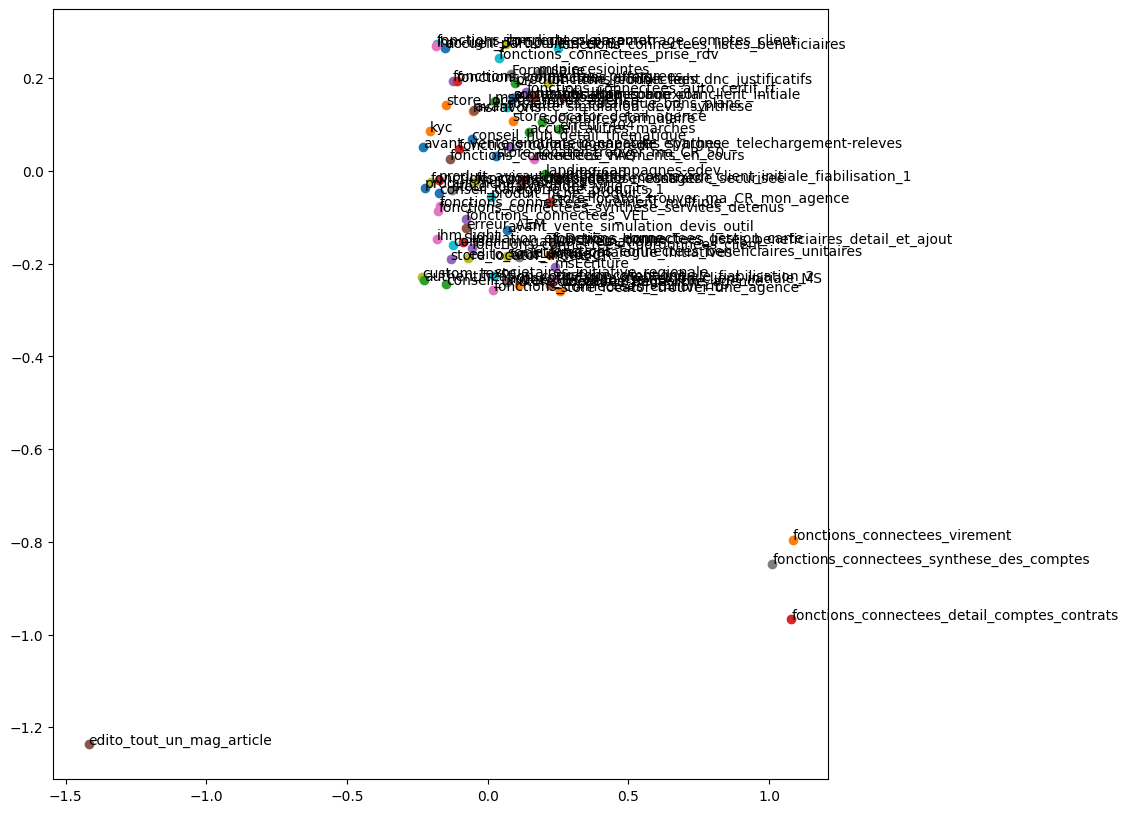

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for word in index.iterrows():
    coord = word[1]["weights"]
    plt.scatter(coord[0], coord[1])
    plt.annotate(word[1]["page_gabarit"], (coord[0], coord[1]))